In [1]:
import glob
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
import pandas as pd
import sys
import seaborn as sns

In [1]:
dir = '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset'

type_1 = ['dent', 'scratch','spacing']
type_2 = ['train', 'test', 'valid']
type_3 = ['images', 'masks']

folder_list = []
name_list=[]

###### spacing만 jpeg 파일이어서 jpg로 변경해주기(train,test,valid - images, masks전부다)

In [3]:
# # rename: 확장자 jpg로 통일
# image_path ='/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/spacing/test/images/'
# image_file = os.listdir(image_path)
# for file in image_file:
#     jpgs = file.split('.')[-1] # 확장자
#     dst_name = file.replace(jpgs, 'jpg')
#     os.rename(image_path+file, image_path+dst_name)


###### floder list 만들기

In [4]:
for i in type_1:
    for j in type_2:
        for k in type_3:
            folder_list.append(f'{dir}/{i}/{j}/{k}/')
            name_list.append(f'{i}_{j}_{k}')

In [5]:
folder_list

['/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/train/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/train/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/test/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/test/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/valid/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/dent/valid/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/train/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/train/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/test/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/test/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/valid/images/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/scratch/valid/masks/',
 '/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/spacing/train/images/',
 '/home/aiffel

In [8]:
for i in range(len(name_list)):
    name_list[i]= glob.glob(folder_list[i]+'*.jpg')

In [9]:
#
de_tr_img = name_list[0]
de_tr_msk = name_list[1]
de_te_img = name_list[2]
de_te_msk = name_list[3]
de_val_img = name_list[4]
de_val_msk = name_list[5]
sc_tr_img = name_list[6]
sc_tr_msk = name_list[7]
sc_te_img = name_list[8]
sc_te_msk = name_list[9]
sc_val_img = name_list[10]
sc_val_msk = name_list[11]
sp_tr_img = name_list[12]
sp_tr_msk = name_list[13]
sp_te_img = name_list[14]
sp_te_msk = name_list[15]
sp_val_img = name_list[16]
sp_val_msk = name_list[17]

##### 파일 개수 확인하기

In [10]:
print("de_tr_img : ", len(de_tr_img))
print("de_tr_msk : ", len(de_tr_msk))
print("de_te_img : ", len(de_te_img))
print("de_te_msk : ", len(de_te_msk))
print("de_val_img : ", len(de_val_img))
print("de_val_msk : ", len(de_val_msk))
print("sc_tr_img : ", len(sc_tr_img))
print("sc_tr_msk : ", len(sc_tr_msk))
print("sc_te_img : ", len(sc_te_img))
print("sc_te_msk : ", len(sc_te_msk))
print("sc_val_img : ", len(sc_val_img))
print("sc_val_msk : ", len(sc_val_msk))
print("sp_tr_img : ", len(sp_tr_img))
print("sp_tr_msk : ", len(sp_tr_msk))
print("sp_te_img : ", len(sp_te_img))
print("sp_te_msk : ", len(sp_te_msk))
print("sp_val_img : ", len(sp_val_img))
print("sp_val_msk : ", len(sp_val_msk))


de_tr_img :  2132
de_tr_msk :  2132
de_te_img :  267
de_te_msk :  267
de_val_img :  267
de_val_msk :  267
sc_tr_img :  2132
sc_tr_msk :  2132
sc_te_img :  267
sc_te_msk :  267
sc_val_img :  267
sc_val_msk :  267
sp_tr_img :  1232
sp_tr_msk :  1232
sp_te_img :  155
sp_te_msk :  155
sp_val_img :  153
sp_val_msk :  153


##### 아무거나 폴더 하나 선택해서 파일 가져와지는지 확인하기

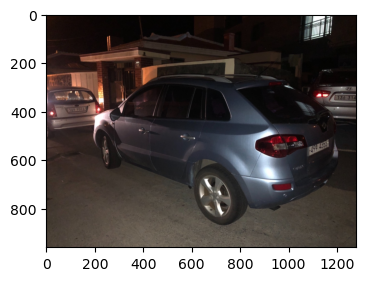

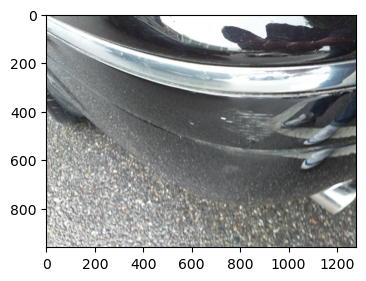

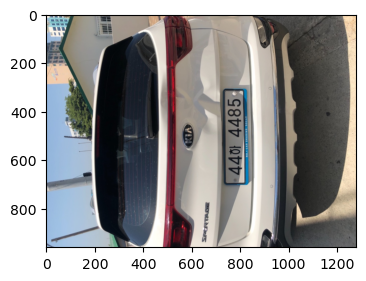

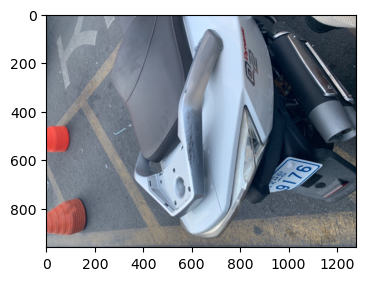

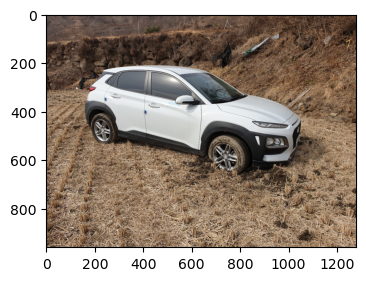

In [11]:
for i in random.sample(sp_tr_img,5):
    plt.figure(figsize=(4,4))
    file_path = img.imread(i)
    plt.imshow(file_path)

## 정상, 파손 비율 파이 그려보기
https://wikidocs.net/92114

https://steadiness-193.tistory.com/178

https://cosmosproject.tistory.com/412

https://codetorial.net/matplotlib/savefig.html

In [58]:
def draw_pie_normal_abnormal(dir, damage, type, img): 
    if img == "masks": # 마스크 이미지 
        mask_list = glob.glob(dir+'*')
        cnt_normal=0
        cnt_abnormal =0
        for i in mask_list:
            mask= cv2.imread(i)
            if (mask == 0).all():
                cnt_normal += 1  
            else:
                cnt_abnormal +=1  
        
        print(f"{damage.upper()} {type}의 총 이미지 개수 : {len(mask_list)}")
        print(f"정상 이미지 개수 : {cnt_normal} 비정상 이미지 개수 :{cnt_abnormal}")
        
        ratio =[]
        labels =['Normal', 'Abnormal']
        colors = ['#d395d0', '#ff9999']
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
        ratio.append(cnt_normal)
        ratio.append(cnt_abnormal)
        plt.figure(figsize=(3,3))
        plt.title(f"{damage.upper()} {type}", pad =15,fontsize=15)
        plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors, 
                wedgeprops=wedgeprops, textprops={'size':8})
        plt.savefig(f'/home/aiffel/Desktop/SUN/result/normal_abnormal_ratio/{damage} {type} normal & abnormal ratio.png', 
                    facecolor='#eeeeee', 
                    dpi = 300, format='png')
        plt.show()
        

DENT train의 총 이미지 개수 : 2132
정상 이미지 개수 : 1564 비정상 이미지 개수 :568


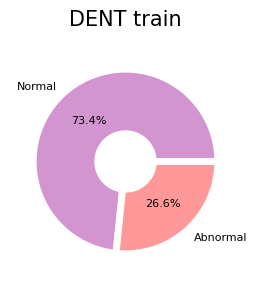

DENT test의 총 이미지 개수 : 267
정상 이미지 개수 : 188 비정상 이미지 개수 :79


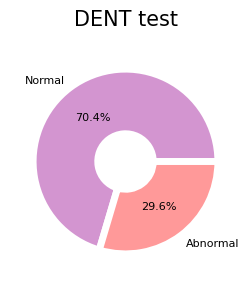

DENT valid의 총 이미지 개수 : 267
정상 이미지 개수 : 194 비정상 이미지 개수 :73


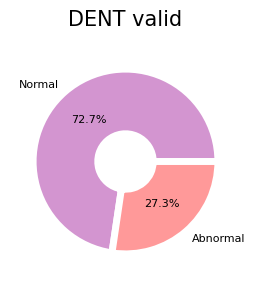

SCRATCH train의 총 이미지 개수 : 2132
정상 이미지 개수 : 567 비정상 이미지 개수 :1565


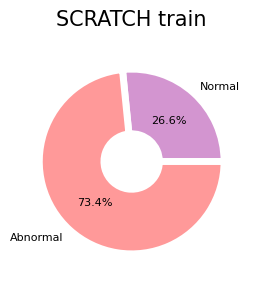

SCRATCH test의 총 이미지 개수 : 267
정상 이미지 개수 : 70 비정상 이미지 개수 :197


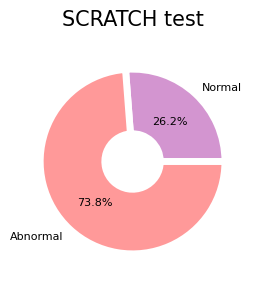

SCRATCH valid의 총 이미지 개수 : 267
정상 이미지 개수 : 74 비정상 이미지 개수 :193


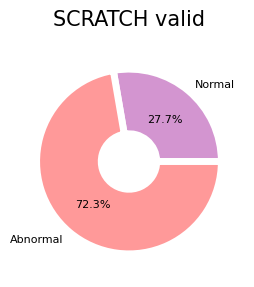

SPACING train의 총 이미지 개수 : 1232
정상 이미지 개수 : 560 비정상 이미지 개수 :672


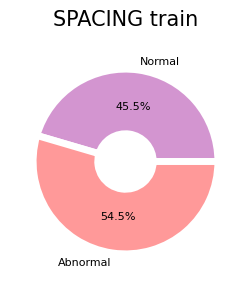

SPACING test의 총 이미지 개수 : 155
정상 이미지 개수 : 69 비정상 이미지 개수 :86


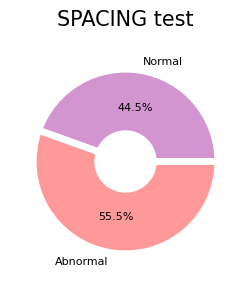

SPACING valid의 총 이미지 개수 : 153
정상 이미지 개수 : 71 비정상 이미지 개수 :82


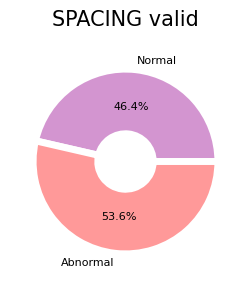

In [59]:
for i in folder_list:
    damage =i.split('/')[-4]
    d_type = i.split('/')[-3]
    i_m = i.split('/')[-2]
    draw_pie_normal_abnormal(i,damage, d_type, i_m)

# 이미지당 파손 비율 히스토그램

In [60]:
def bg_ratio(root_dir):
    size_dict = {}
    size_dict['dent'] = {}
    size_dict['scratch'] = {}
    size_dict['spacing'] = {}
    
    for damage_ in ['dent', 'scratch', 'spacing']:
        for train_ in ['train', 'valid', 'test']:
            
            label_dir = os.listdir(os.path.join(root_dir, damage_, train_, 'masks'))
            class_ratio = []
            for i in label_dir:
                if i == '.DS_Store':
                    continue
                mask_ = os.path.join(root_dir, damage_, train_, 'masks', i)
                mask_ = Image.open(mask_)
                mask_ = (np.array(mask_.convert('L')) != 0).astype('uint8')
                class_ratio.append((mask_ != 0).sum() / (mask_.shape[0] * mask_.shape[1]))
            size_dict[damage_][train_] = class_ratio
            plt.figure(figsize=(2,2))
            sns.histplot(data=size_dict[damage_][train_], bins=10, stat='probability')
            plt.title(f'{damage_} {train_}')
            plt.savefig(f'/home/aiffel/Desktop/SUN/result/damage_ratio/{damage_} {train_} damage ratio.png', 
                    facecolor='#eeeeee', 
                    dpi = 300, format='png')
            plt.show()
    # return size_dict


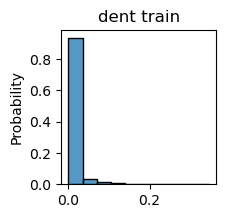

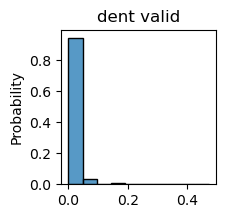

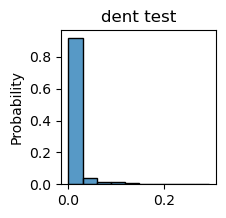

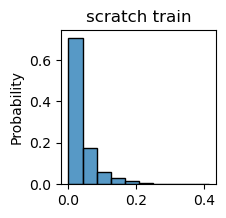

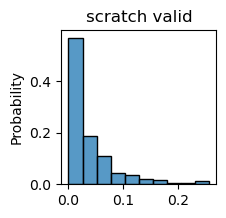

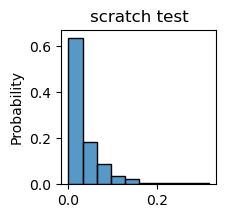

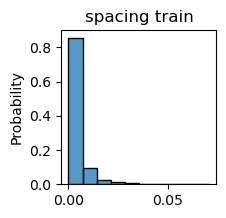

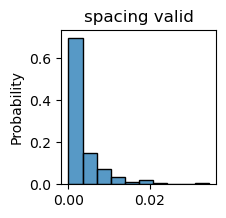

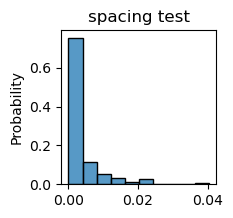

{'dent': {'train': [0.0,
   0.0,
   0.024515787760416668,
   0.0,
   0.0,
   0.0,
   0.010810004340277778,
   0.0022684733072916665,
   0.00560625,
   0.06684791666666667,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02225494384765625,
   0.0,
   0.0,
   0.0,
   0.0,
   0.06620416666666666,
   0.013808333333333334,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0013354166666666666,
   0.0,
   0.0011229166666666666,
   0.0,
   0.0,
   0.0,
   0.017609596252441406,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.009674072265625,
   0.0,
   0.02559661865234375,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.011145273844401041,
   0.0,
   0.0,
   0.0,
   0.0013950892857142857,
   0.0,
   0.06707127888997395,
   0.0,
   0.0,
   0.0,
   0.014702083333333333,
   0.0,
   0.0,
   0.0,
   0.0,
   0.07300821940104167,
   0.34745208333333333,
   0.0,
   0.0022989908854166665,
   0.0,
   0.01550

In [61]:
bg_ratio(dir+"/")

# origin, mask, masking 이미지 원하는 수 만큼 임의로 뽑아보기

In [53]:
def plt_image(num, damage, type, img):
    if img == "images":
        return None
    else :
        print(damage, type, img)
        separated_file= os.listdir(f'/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/{damage}/{type}/images/')
        img_list = []
        for i in random.sample(separated_file,num):
            img_list.append(i)
        img_list = sorted(img_list)

        separated_mask_file= os.listdir(f'/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/{damage}/{type}/masks/')
        mask_list=[]
        for i in separated_mask_file:
            for j in img_list:
                if j == i:
                    mask_list.append(i)
                else :
                    pass    
        mask_list = sorted(mask_list)

        for i in range(num):
            plt.figure(figsize=(10,10))
            plt.subplot(1, 3, 1)    
            plt.title('origin')
            origin_path = f'/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/{damage}/{type}/images/'
            img_file_path = cv2.imread(origin_path+img_list[i])
            plt.imshow(img_file_path)

            plt.subplot(1,3,2)                
            plt.title('mask')
            origin_mask_path = f'/home/aiffel/Desktop/SUN/link/dataset/socar_dataset/{damage}/{type}/masks/'
            mask_list_path =cv2.imread(origin_mask_path+mask_list[i])
            plt.imshow(mask_list_path)

            plt.subplot(1,3,3)  
            plt.title(f'{damage} {type} masking_{i}')
            src1= cv2.imread(origin_path+img_list[i])
            src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
            src2 = cv2.imread(origin_mask_path+mask_list[i])
            if src1 is None or src2 is None:
                print('Image load fauled!')
                sys.exit()
            dst = cv2.addWeighted(src1,1,src2,1,0.0)
            plt.imshow(dst)
            plt.savefig(f'/home/aiffel/Desktop/SUN/result/masking/{damage} {type} masking_{i}.png', 
                    facecolor='#eeeeee', 
                    dpi = 300, format='png')

        plt.tight_layout()
        plt.show() 

dent train masks


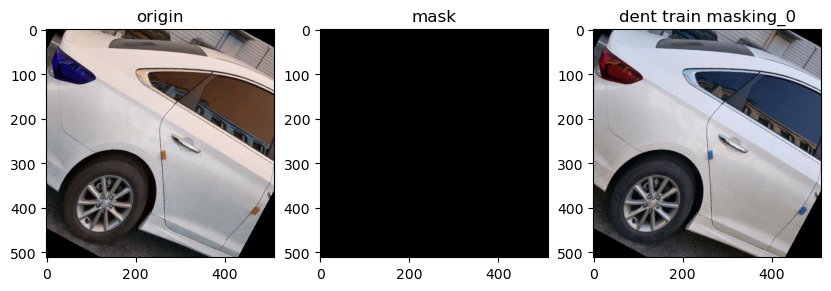

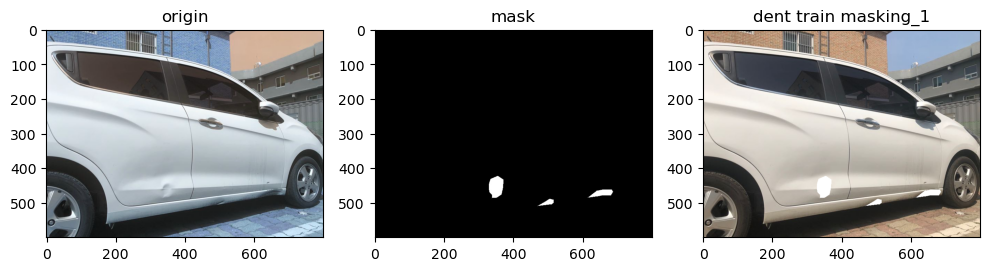

dent test masks


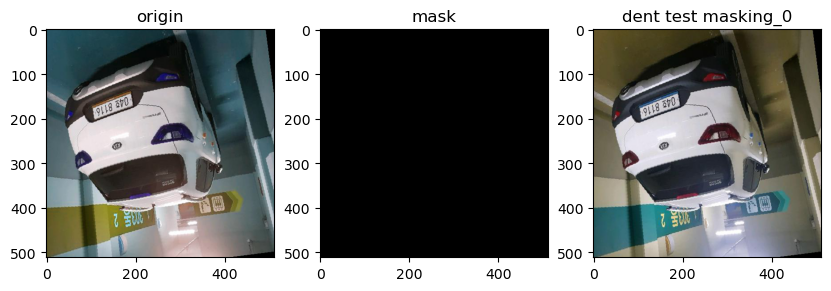

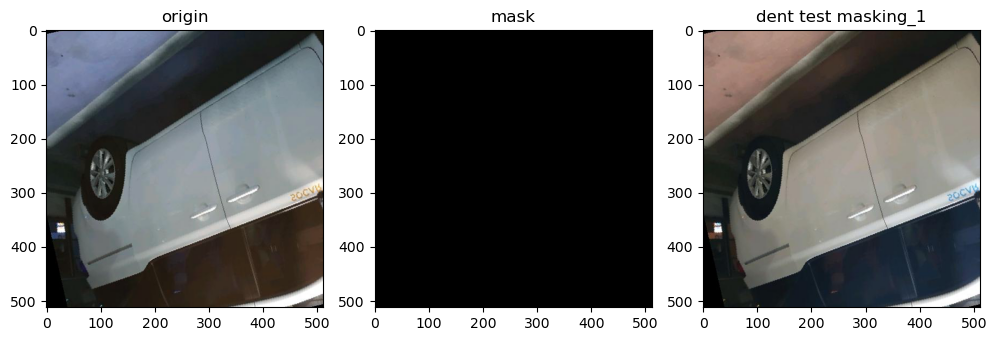

dent valid masks


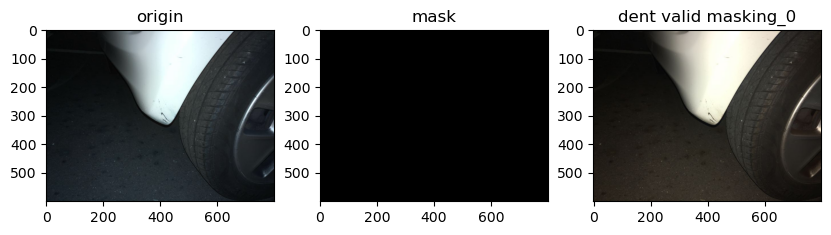

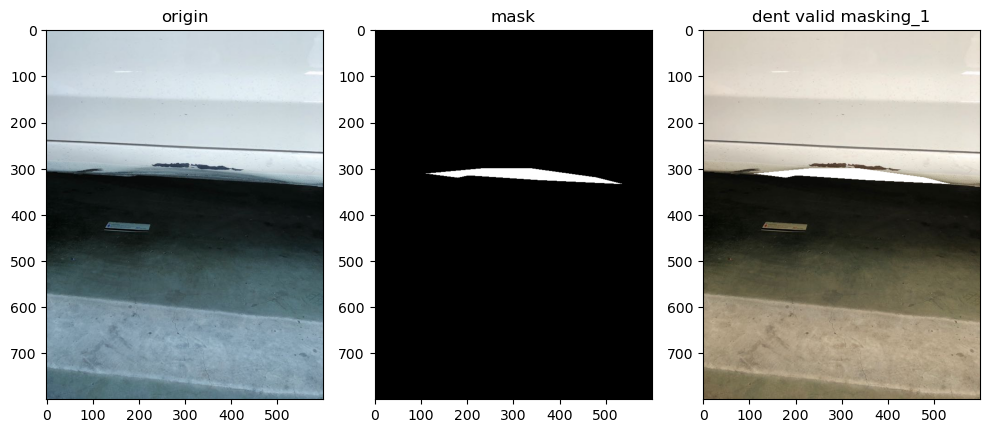

scratch train masks


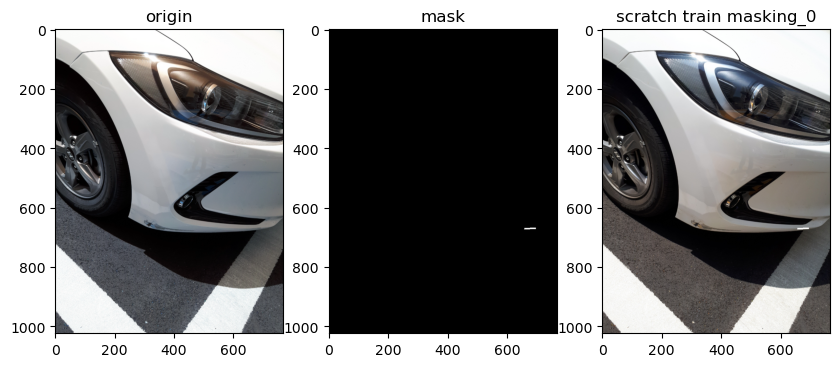

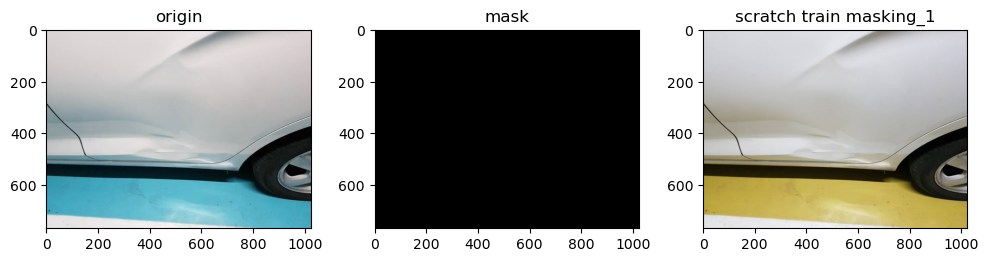

scratch test masks


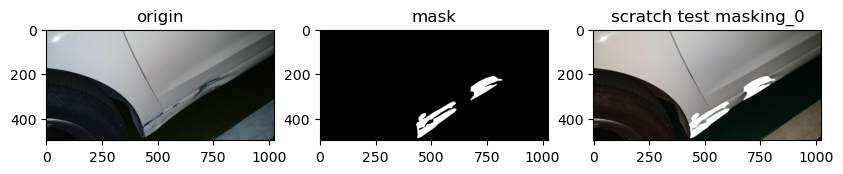

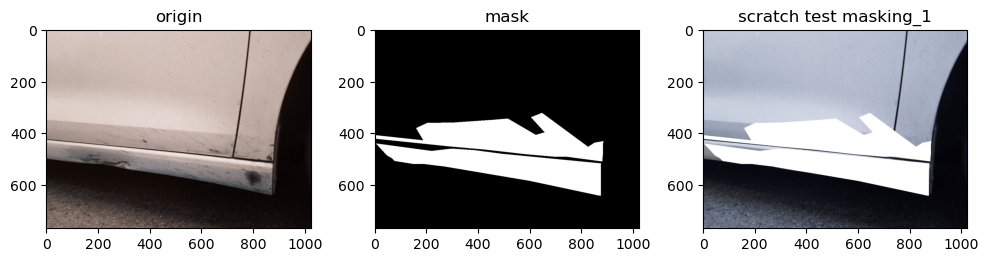

scratch valid masks


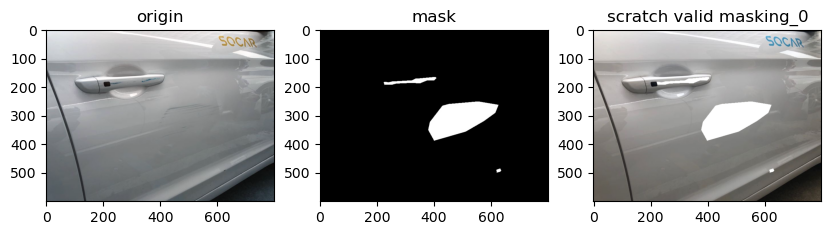

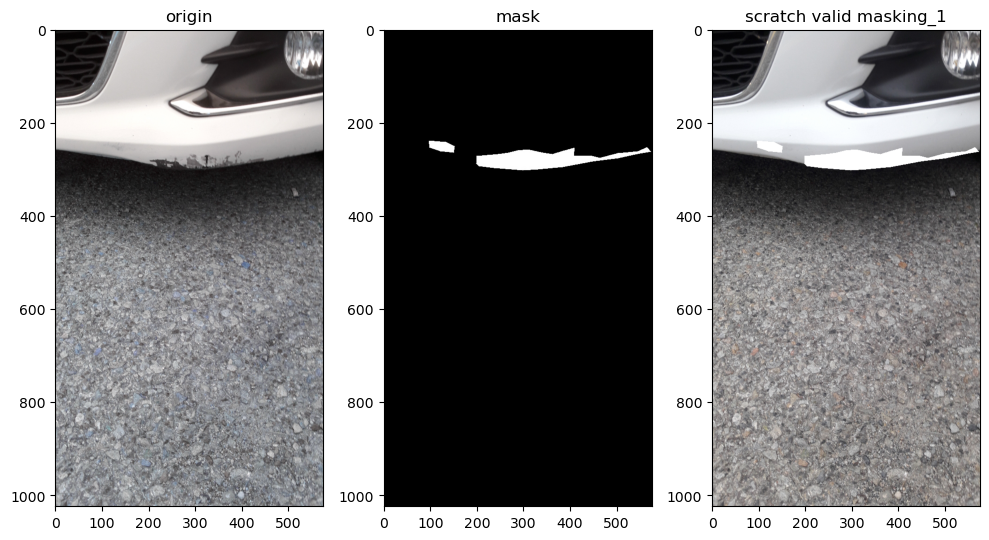

spacing train masks


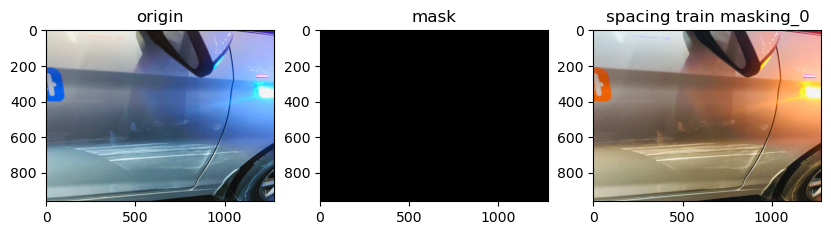

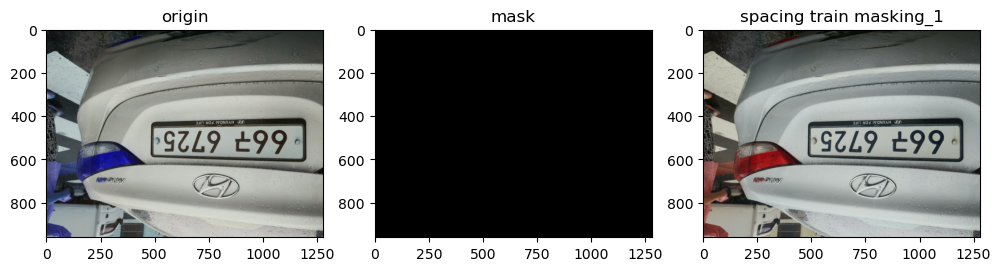

spacing test masks


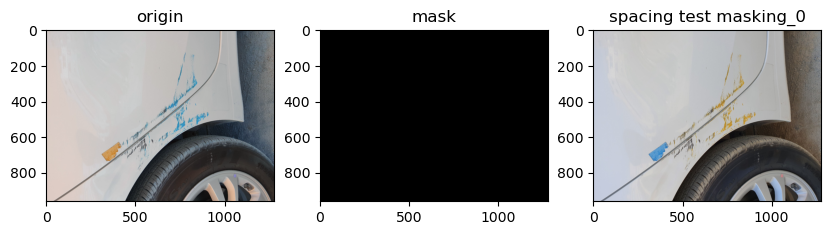

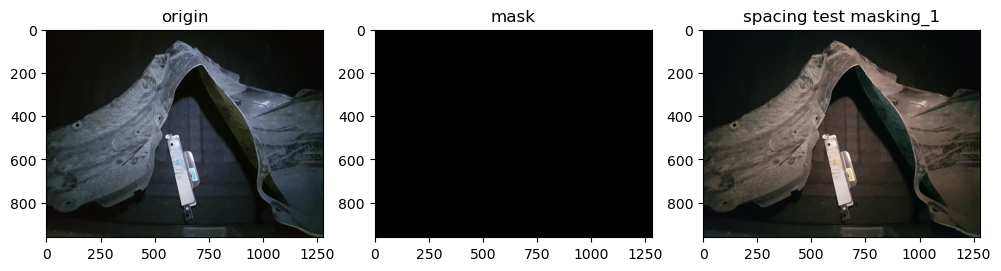

spacing valid masks


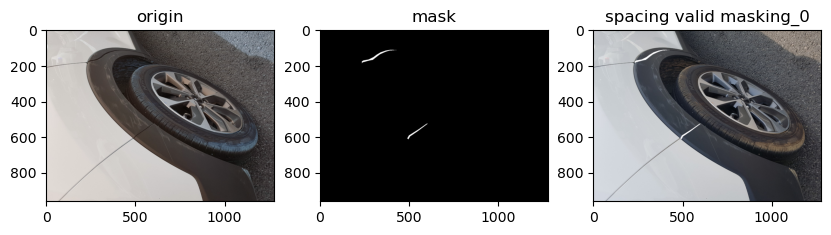

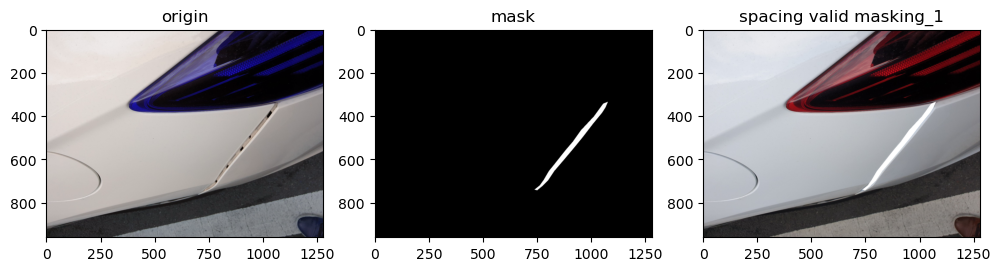

In [54]:
# 결과 이미지 저장하는 경로에 파일이 존재하면 비우기
if os.listdir("/home/aiffel/Desktop/SUN/result/masking"):
    [os.remove(f) for f in glob.glob("/home/aiffel/Desktop/SUN/result/masking/*.png")]


# 원본 + 마스크 + 마스킹이미지 plt로 뽑기
for i in folder_list:
    damage =i.split('/')[-4]
    d_type = i.split('/')[-3]
    i_m = i.split('/')[-2]
    plt_image(2,damage,d_type,i_m)